# How to run the PyRICE model

This notebook provides an example of how to run the PyRICE model and shows the main parameters and their domains.

---

## 1. Imports
First, we need some imports, and we need to set the current working directory straight.

In [1]:
%cd /Users/maryamalki/Desktop/PyRICE_2022

/Users/maryamalki/Desktop/PyRICE_2022


In [2]:
import pandas as pd

In [3]:
from model.pyrice import PyRICE
from model.enumerations import *

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.8)
sns.set_style("whitegrid")

---
## 2. Initialize the model

The most important parameters are listed below.

### Model Parameters

**Bolded** elements are model default values.

| Variable              | Values                                                                                                                                          | Description                                                                                                                               |
|-----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| `model_specification` | **`ModelSpec.STANDARD`** <br> `ModelSpec.Validation_1` <br> `ModelSpec.Validation_2`                                                            | Stochastic simulation model <br> Replicating RICE2010 <br> Deterministic RICE2010                                                         |
| `damage_function`     | **`DamageFunction.NORDHAUS`** <br> `DamageFunction.NEWBOLD` <br> `DamageFunction.WEITZMAN`                                                      | Nordhaus + SLR <br> Newbold & Daigneault <br> Weitzman                                                                                    |
| `welfare_function`    | **`WelfareFunction.UTILITARIAN`** <br> `WelfareFunction.EGALITARIAN` <br> `WelfareFunction.SUFFICIENTARIAN` <br> `WelfareFunction.PRIORITARIAN` | Total aggregated utility <br> Equal distribution of risks & benefits <br> People above some threshold  <br> Wellbeing of worst-off region |


In [4]:
model_specification = ModelSpec.STANDARD
damage_function = DamageFunction.NORDHAUS
welfare_function = WelfareFunction.UTILITARIAN

model = PyRICE(
    model_specification=model_specification,
    damage_function=damage_function,
    welfare_function=welfare_function
)

---
## 3. Run the model
Next, we can run the model with specific lever values. The most important parameters are listed below.

### Levers

| Variable            | Values           | Default | Description                                            |
|---------------------|------------------|---------|--------------------------------------------------------|
| `sr`                | `[0.1, 0.5]`     | `0.248` | Savings rate                                           |
| `miu`               | `[2005, 2305]`   | `2135`  | Emission control rate target (year of zero-emission)   |
| `irstp_consumption` | `[0.001, 0.015]` | `0.015` | Initial rate of social time preference for consumption |
| `irstp_damage`      | `[0.001, 0.015]` | `0.015` | Initial rate of social time preference for damage      |


### Miscellaneous Parameters

| Variable    | Values         | Default | Description                                             |
|-------------|----------------|---------|---------------------------------------------------------|
| `precision` | `{10, 20, 30}` | `10`    | Precision of timeseries data of final outcomes in years |

Let's take the **original policy by Nordhaus** (which is also the default policy):

In [5]:
results = model.run()
# for k, v in results.items():
#     print(f'{k}:\t{v}')

---
## 4. View Results
Running the model will return a dictionary containing all outcome variables. This dictionary is handy for conducting further optimization. It is, however, not handy, to inspect the results.

An alternative data structure for this is in form of a `Results` object which is also saved within the model and contains the same information as the dictionary.

First, let's get the results in better formatting.

In [6]:
results_formatted = model.get_better_formatted_results()

## Highly Aggregated variables

In [7]:
print(f'aggregated_utility_gini: \t{results_formatted.aggregated_consumption_gini}')
print(f'aggregated_impact_gini: \t{results_formatted.aggregated_damage_gini}')
print(f'aggregated_utility: \t\t{results_formatted.aggregated_utility}')
print(f'aggregated_disutility: \t\t{results_formatted.aggregated_disutility}')
print(f'aggregated_costs: \t\t{results_formatted.aggregated_costs}')


aggregated_utility_gini: 	0.35600596223546876
aggregated_impact_gini: 	0.5186781918838592
aggregated_utility: 		2194.572347354354
aggregated_disutility: 		18997.033130718628
aggregated_costs: 		4594.730304707401


## Dataframe on spatially aggregated variables of interest

In [8]:
results_formatted.df_main

,Damages,Utility,Disutility,Lowest income per capita,Highest climate impact per capita,Distance to consumption threshold,Population below consumption threshold,Distance to damage threshold,Population above damage threshold,Intratemporal consumption Gini,Intratemporal damage Gini,Atmospheric temperature,Temperature overshoot,Industrial emission,Total output,Regions below consumption threshold,Regions above damage threshold,Costs
2005,0.087272,-1070.654524,0.508029,0.389919,0.000980,0.391524,1344.275980,0.000000,0.000000,0.505547,0.585386,0.830000,0.0,36.419679,55.291673,"[China, India, Africa, Other non-OECD Asia, In...",[],0.087272
2015,0.245626,662.957660,0.002292,0.691963,0.008106,0.399325,845.308685,0.000000,0.000000,0.433107,0.568721,0.980000,0.0,39.435565,80.936854,"[India, Africa, Other non-OECD Asia, Africa]",[],0.338535
2025,0.746878,1469.325540,0.309840,0.871102,0.017182,0.270568,975.141500,0.000000,0.000000,0.420194,0.550242,1.642973,0.0,44.128477,111.236430,"[India, Africa, Other non-OECD Asia, Africa]",[],1.041916
2035,1.871794,2169.743528,7.249705,1.221489,0.029753,0.113346,1091.706185,0.000000,0.000000,0.406094,0.537498,2.381072,1.0,47.887771,146.473220,"[India, Africa, Other non-OECD Asia, Africa]",[],2.576700
2045,3.900216,2649.004665,55.055453,1.651813,0.045436,0.573187,300.634834,0.110931,3046.226644,0.393093,0.533498,3.115173,2.0,50.209103,185.563418,[Africa],"[India, Africa]",5.307379
2055,7.052978,2905.239880,68.174042,2.183351,0.063542,0.426167,322.288187,0.395764,6006.781657,0.372936,0.533706,3.803844,3.0,50.577759,226.011594,[Africa],"[China, India, Africa, Other non-OECD Asia]",9.517882
2065,11.427331,2967.580486,78.540863,2.801177,0.082913,0.287867,333.648812,0.862676,6797.999674,0.353735,0.533135,4.426132,4.0,49.293330,267.276442,[Africa],"[China, India, Middle East, Africa, Other non-...",15.366267
2075,17.117982,2910.142615,88.613377,3.468403,0.102627,0.178347,345.409897,1.624748,6836.647299,0.336177,0.534182,4.973608,5.0,46.754413,310.276707,[Africa],"[China, India, Middle East, Africa, Other non-...",23.022360
2085,24.147385,2779.957114,98.350228,4.181197,0.122051,0.089741,357.585559,2.654687,6880.005155,0.320087,0.536427,5.444895,6.0,43.090269,355.027246,[Africa],"[China, India, Middle East, Africa, Other non-...",32.577687
2095,32.485392,2614.651013,108.095845,4.932781,0.140731,0.018187,370.190412,3.918911,7625.786307,0.305531,0.539579,5.841838,7.0,38.379890,401.452963,[Africa],"[China, India, Middle East, Africa, Latin Amer...",44.070338


## Dataframe on spatially and temporally disaggregated population

In [9]:
results_formatted.df_population.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,296.842578,490.080193,127.773000,143.150000,155.942468,1304.500000,1094.583000,412.769001,763.506112,555.380079,129.169624,937.195567
2015,325.864356,511.847206,126.110786,137.963728,157.730876,1387.750163,1252.943464,499.316474,946.293499,617.246624,138.914928,1081.012964
2025,351.756112,524.060185,121.100084,132.326519,159.228609,1444.554518,1385.654351,582.455128,1137.698804,668.207819,146.531473,1214.655542
2035,372.610827,529.149615,114.022140,125.369495,157.787111,1453.711091,1479.182218,655.972586,1325.572319,704.769042,151.223203,1328.204071
2045,389.051763,529.144110,106.008825,119.081377,154.937380,1431.779453,1543.052473,718.790224,1503.174171,724.343533,152.626045,1416.592288


## Dataframe on spatially disaggregated CPC

In [10]:
results_formatted.df_cpc.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,34.276554,21.921925,25.678621,9.586258,4.163815,2.624481,1.564919,6.243077,1.190955,6.264255,24.158743,2.115834
2015,38.915547,25.541456,28.701900,14.496564,12.679826,6.600627,2.665580,8.615532,2.113509,8.763969,29.113852,2.773830
2025,46.130614,31.265274,34.626650,16.606131,12.560557,8.856831,3.866920,11.167111,2.660666,11.700759,35.143621,4.090313
2035,53.906016,37.621000,41.430328,20.629883,12.675307,11.566648,5.369299,14.048786,3.730875,15.139135,41.781482,5.735647
2045,61.743740,44.199788,48.415026,24.915234,12.908441,14.637670,7.190799,17.231596,5.045239,19.058604,48.663198,7.758734


## Dataframe on CPC pre damage
Cell entries represent quintiles.

In [11]:
results_formatted.df_cpc_pre_damage.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,"[8.92247267057481, 17.67335932825395, 26.25265...","[7.992526419508717, 13.638652500802959, 18.391...","[9.899247036257877, 16.455891177155955, 21.341...","[3.4064564923177976, 5.373565170980188, 7.2926...","[1.7697210946024313, 2.7050722255242206, 3.518...","[0.8549709133692015, 1.4074136573923777, 2.012...","[0.6381091444794667, 0.9217132086925632, 1.197...","[2.1733546278811278, 3.5553233331816734, 4.908...","[0.3922488874503813, 0.6369693070629235, 0.885...","[1.3478796841768008, 2.711059885459769, 4.1613...","[8.776638808422248, 15.281424898890986, 20.609...","[0.798476001209541, 1.2114011328240586, 1.6400..."
2015,"[10.135447548922603, 20.07598264498131, 29.821...","[9.330449090944462, 15.921718133732048, 21.469...","[11.07298088544938, 18.407033160227538, 23.871...","[5.15267632582234, 8.12816547171975, 11.031081...","[5.386984868790368, 8.234169323250176, 10.7090...","[2.158712502613438, 3.5535728889175053, 5.0812...","[1.0883737092345318, 1.5720953577832126, 2.042...","[3.0039418082937672, 4.914055104278602, 6.7843...","[0.6971481372716055, 1.132092352905081, 1.5731...","[1.8868988341864428, 3.7952168857028874, 5.825...","[10.602718559066025, 18.460899544933174, 24.89...","[1.0481233775978576, 1.5901515449907946, 2.152..."
2025,"[12.052526919109054, 23.873274474389092, 35.46...","[11.466031636470627, 19.565931076728095, 26.38...","[13.406367586842645, 22.285909754751415, 28.90...","[5.918154506683042, 9.335680348570433, 12.6698...","[5.347140782421301, 8.173266431988338, 10.6298...","[2.912008048980718, 4.793613249860566, 6.85441...","[1.5915847477880787, 2.2989557468050026, 2.986...","[3.918302720574334, 6.409829721396534, 8.84947...","[0.8863305883967972, 1.4393039694502578, 2.000...","[2.5283688604570203, 5.08543861421651, 7.80582...","[12.85029411010552, 22.374260654750547, 30.174...","[1.5545780907430984, 2.358515042827751, 3.1930..."
2035,"[14.160705664182657, 28.049090065592573, 41.66...","[13.891369453701321, 23.704589862456405, 31.96...","[16.13977855111978, 26.829761747316, 34.794847...","[7.384157056127489, 11.648247750510969, 15.808...","[5.422389726893377, 8.2882867198248, 10.779405...","[3.834717668192118, 6.312535238408563, 9.02633...","[2.235297559882662, 3.2287631420527347, 4.1946...","[4.976021632013811, 8.140119236759501, 11.2383...","[1.258946673931883, 2.0443917527363387, 2.8409...","[3.2908233898344683, 6.619002709994638, 10.159...","[15.38567617247645, 26.788735423717558, 36.128...","[2.199774146674633, 3.3373687990647736, 4.5182..."
2045,"[16.341376239787, 32.36849524419348, 48.081357...","[16.474724337861613, 28.112893032442056, 37.90...","[19.02257885885532, 31.62194927186339, 41.0097...","[8.971490043566911, 14.15220964619006, 19.2065...","[5.572077302695296, 8.517088707348593, 11.0769...","[4.907665679764344, 8.078772734381305, 11.5518...","[3.0357568001851174, 4.384982044711837, 5.6967...","[6.17619781636318, 10.103450180272526, 13.9489...","[1.730436360100621, 2.8100394532010258, 3.9049...","[4.1758085737108175, 8.39901902702869, 12.8919...","[18.09513625757521, 31.506305749984932, 42.490...","[3.0110289429157118, 4.568157173025549, 6.1846..."


## Dataframe on CPC post damage
Cell entries represent quintiles.

In [12]:
results_formatted.df_cpc_post_damage.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,"[8.911904088260501, 17.652425405592915, 26.221...","[7.981923423841984, 13.620559276486162, 18.366...","[9.886255978036242, 16.434295651800507, 21.313...","[3.403121505003289, 5.368304345920682, 7.28555...","[1.7677483782588717, 2.7020568689202467, 3.514...","[0.8529563536154934, 1.4040973821055043, 2.007...","[0.6337878018798845, 0.9154712693820557, 1.189...","[2.163454303446009, 3.539127699934023, 4.88615...","[0.389918535294657, 0.6331850699488487, 0.8798...","[1.3453601935034907, 2.705992304000989, 4.1535...","[8.76502229835981, 15.261198838552714, 20.5817...","[0.7956960938647655, 1.2071836198349322, 1.634..."
2015,"[10.118042277616077, 20.04150681912415, 29.770...","[9.29981459175741, 15.869442636971913, 21.3992...","[11.050208913525179, 18.369178453652243, 23.82...","[5.146280186838308, 8.118075787688602, 11.0173...","[5.383221015085465, 8.228416159009145, 10.7015...","[2.145203787676925, 3.5313354658681684, 5.0494...","[1.0795511144003358, 1.559351609689374, 2.0258...","[2.9855960850820327, 4.8840439054792775, 6.742...","[0.6919627900648059, 1.1236719159762099, 1.561...","[1.8822190571459556, 3.785804208921496, 5.8109...","[10.562777504853662, 18.39135626832675, 24.803...","[1.0431466463536825, 1.5826011391453816, 2.142..."
2025,"[11.993959595415236, 23.757266121687874, 35.28...","[11.38388324991849, 19.425750958592797, 26.194...","[13.331185247527623, 22.160931320565403, 28.73...","[5.895176473489922, 9.299433310293963, 12.6206...","[5.332591432284037, 8.151027310199161, 10.6008...","[2.8784701647781197, 4.738404732788596, 6.7754...","[1.566077056789415, 2.262111304251377, 2.93881...","[3.8698101748235083, 6.330502271940494, 8.7399...","[0.8711020655559658, 1.41457451335271, 1.96573...","[2.5129535728611283, 5.054433051691415, 7.7582...","[12.750422959924897, 22.20037022649383, 29.940...","[1.5382311236021908, 2.3337143794606168, 3.159..."
2035,"[14.015564206572163, 27.76159833224871, 41.238...","[13.698018652112788, 23.374651085253117, 31.51...","[15.95048702019531, 26.5150953062987, 34.38676...","[7.323608526001726, 11.552734576228074, 15.678...","[5.381322947262939, 8.225514904927618, 10.6977...","[3.7591605528703576, 6.188156602417357, 8.8484...","[2.1745051245280447, 3.14095184654051, 4.08055...","[4.868412922405799, 7.96408549094788, 10.99529...","[1.2214891042434985, 1.9835647549499151, 2.756...","[3.2514218189946664, 6.539752299604243, 10.038...","[15.158676002509763, 26.39349458891727, 35.595...","[2.1569837474345555, 3.2724497056481887, 4.430..."
2045,"[16.053372425076667, 31.79802614967109, 47.233...","[16.09335211058278, 27.46210966204027, 37.0313...","[18.639401921115635, 30.9849798169195, 40.1836...","[8.844907930739549, 13.952530820321545, 18.935...","[5.4803278940308635, 8.376846960870353, 10.894...","[4.757242888083826, 7.831153677307221, 11.1978...","[2.9121501076302816, 4.206439044354852, 5.4647...","[5.9713678389710445, 9.768375182103766, 13.486...","[1.6518130453880264, 2.6823637863125973, 3.727...","[4.093226842590557, 8.232918134537904, 12.6370...","[17.65538344668352, 30.740631133494066, 41.457...","[2.917792831469253, 4.426704792671902, 5.99309..."


---
## 5. More Results

More internal variables can also be accessed via the model attributes. For this purpose, go to the `Submodels` folder in this repository and have a look at the individual submodels and their attributes.

## Visualizations

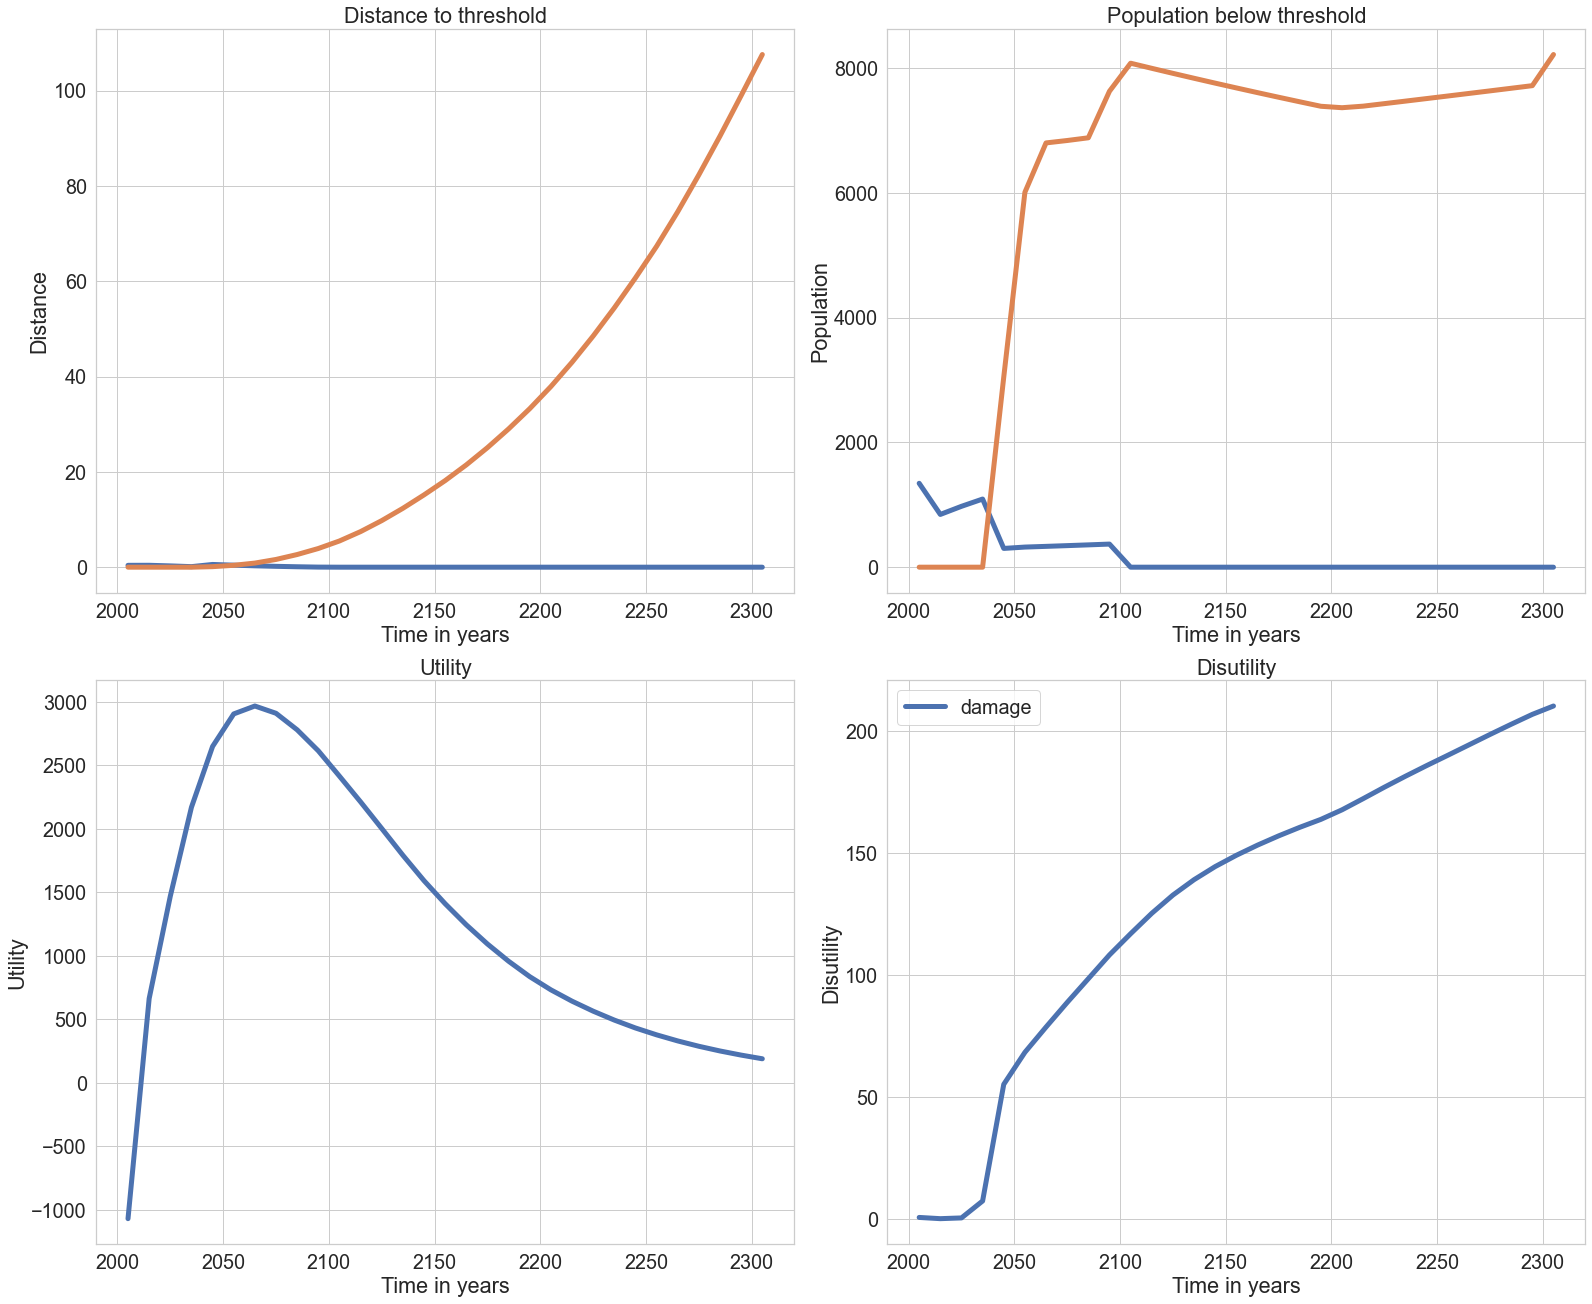

In [13]:
mosaic = """
    AB
    CD
    """
line_width = 5
fig = plt.figure(constrained_layout=True, figsize=(22, 18))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(results_formatted.df_main.loc[:, 'Distance to consumption threshold'], label='consumption', linewidth=line_width)
ax_dict["A"].set_title('Distance to consumption threshold')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Distance')

ax_dict["A"].plot(results_formatted.df_main.loc[:, 'Distance to damage threshold'], label='damage', linewidth=line_width)
ax_dict["A"].set_title('Distance to threshold')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Distance')

ax_dict["B"].plot(results_formatted.df_main.loc[:, 'Population below consumption threshold'], label='consumption', linewidth=line_width)
ax_dict["B"].set_title('Population below consumption threshold')
ax_dict["B"].set_xlabel('Time in years')
ax_dict["B"].set_ylabel('Population')

ax_dict["B"].plot(results_formatted.df_main.loc[:, 'Population above damage threshold'], label='damage', linewidth=line_width)
ax_dict["B"].set_title('Population below threshold')
ax_dict["B"].set_xlabel('Time in years')
ax_dict["B"].set_ylabel('Population')

ax_dict["C"].plot(results_formatted.df_main.loc[:, 'Utility'], linewidth=line_width, label='consumption')
ax_dict["C"].set_title('Utility')
ax_dict["C"].set_xlabel('Time in years')
ax_dict["C"].set_ylabel('Utility')

ax_dict["D"].plot(results_formatted.df_main.loc[:, 'Disutility'], linewidth=line_width, label='damage')
ax_dict["D"].set_title('Disutility')
ax_dict["D"].set_xlabel('Time in years')
ax_dict["D"].set_ylabel('Disutility')

# Remove duplicate labels
handles, labels = fig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

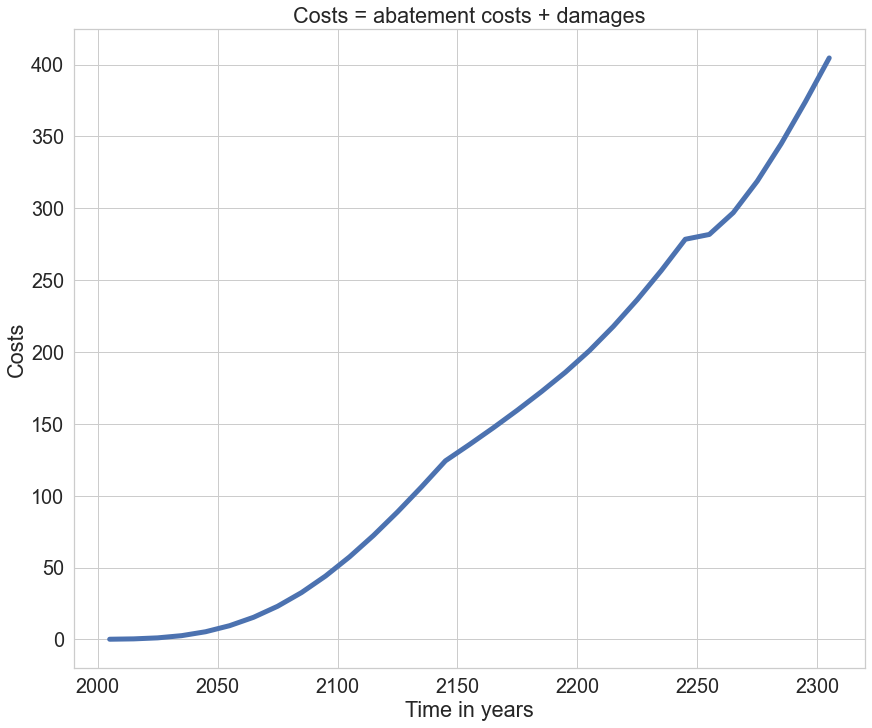

In [14]:
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(results_formatted.df_main.loc[:, 'Costs'], linewidth=line_with)
ax_dict["A"].set_title('Costs = abatement costs + damages')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Costs')

plt.show()

In [15]:
regions_ = results_formatted.df_main.loc[:, 'Regions above damage threshold']

In [16]:
nrs = []

for value in regions_:
    nrs.append(len(value))

In [17]:
years = list(range(2005, 2310, 10))

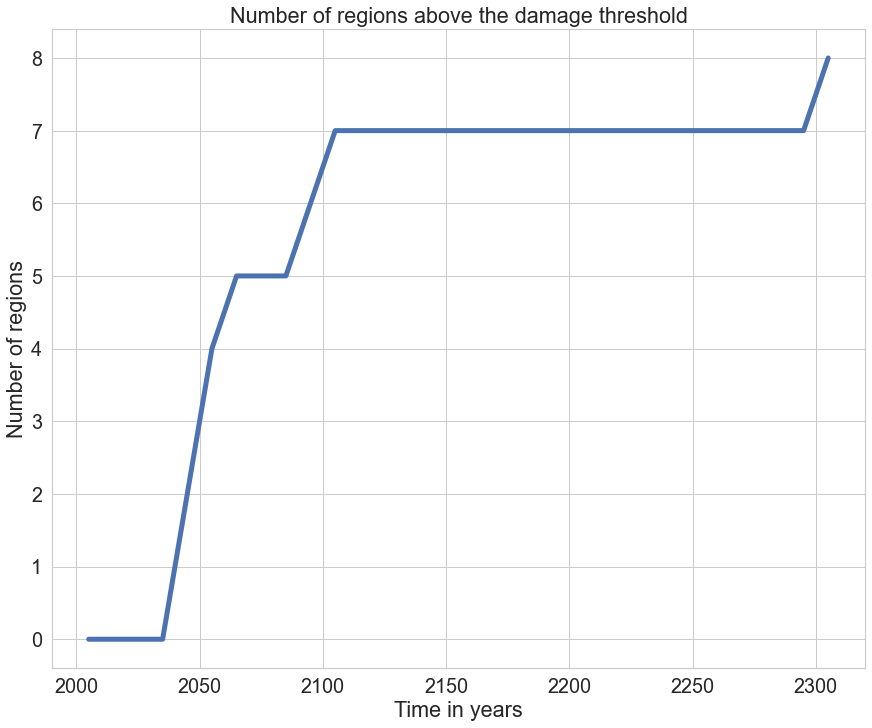

In [18]:
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(years, nrs, linewidth=line_with)
ax_dict["A"].set_title('Number of regions above the damage threshold')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Number of regions')
ax_dict["A"].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

## Consumption and damages

In [19]:
consumption = model.econ_model.CPC.sum(axis=0)
damages = model.econ_model.damages.sum(axis=0)
output = model.econ_model.Y.sum(axis=0)
output_gross = model.econ_model.Y_gross.sum(axis=0)

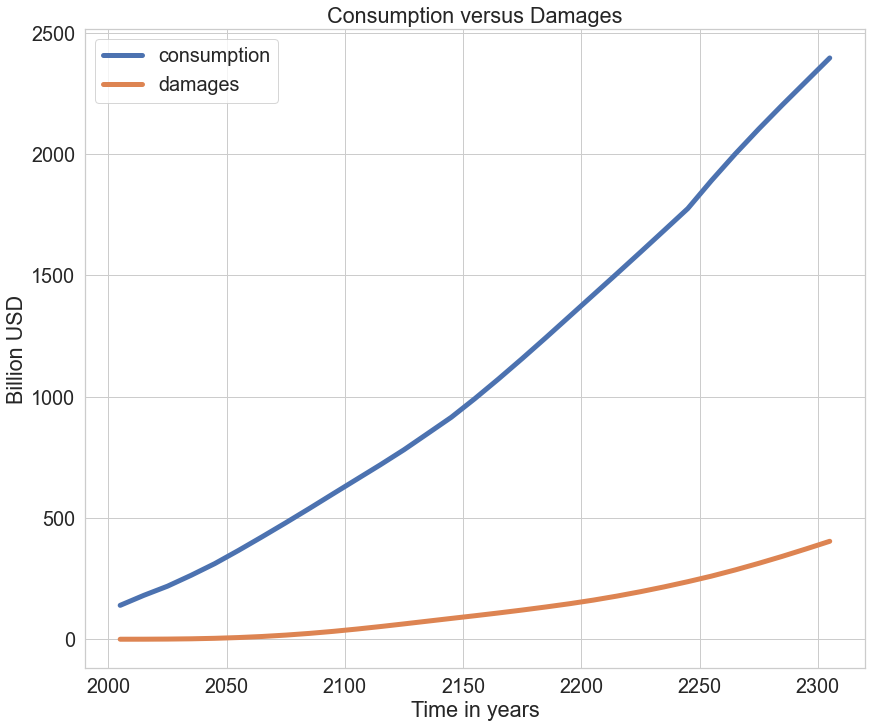

In [20]:
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(years, consumption, linewidth=line_with, label='consumption')
ax_dict["A"].plot(years, damages, linewidth=line_with, label='damages')
# ax_dict["A"].plot(years, output, linewidth=line_with, label='Y')
# ax_dict["A"].plot(years, output_gross, linewidth=line_with, label='Y_gross')
ax_dict["A"].set_title('Consumption versus Damages')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Billion USD')

plt.legend()
plt.show()

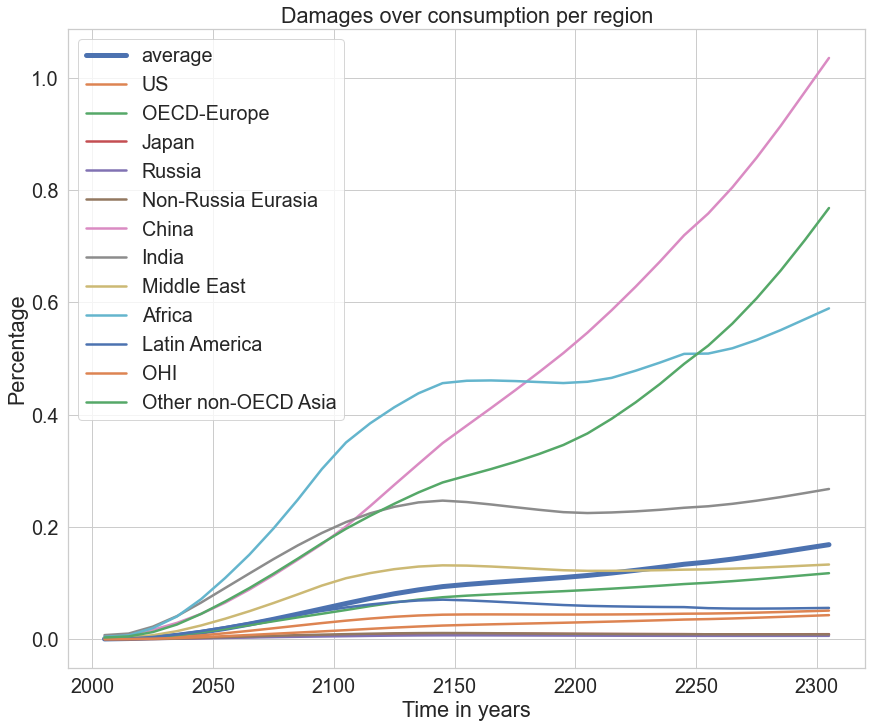

In [21]:
ratio = damages/consumption

mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(years, ratio, linewidth=line_with, label='average')
ax_dict["A"].set_title('Damages over consumption')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Percentage')

d = model.econ_model.damages
cpc = model.econ_model.CPC
region_names = model.regions_list
ratio_regions = d/cpc

line_with = 2.5
for idx, region in enumerate(ratio_regions):
    ax_dict["A"].plot(years, region, linewidth=line_with, label=f'{region_names[idx]}')
    ax_dict["A"].set_title('Damages over consumption per region')
    ax_dict["A"].set_xlabel('Time in years')
    ax_dict["A"].set_ylabel('Percentage')

plt.legend()
plt.show()

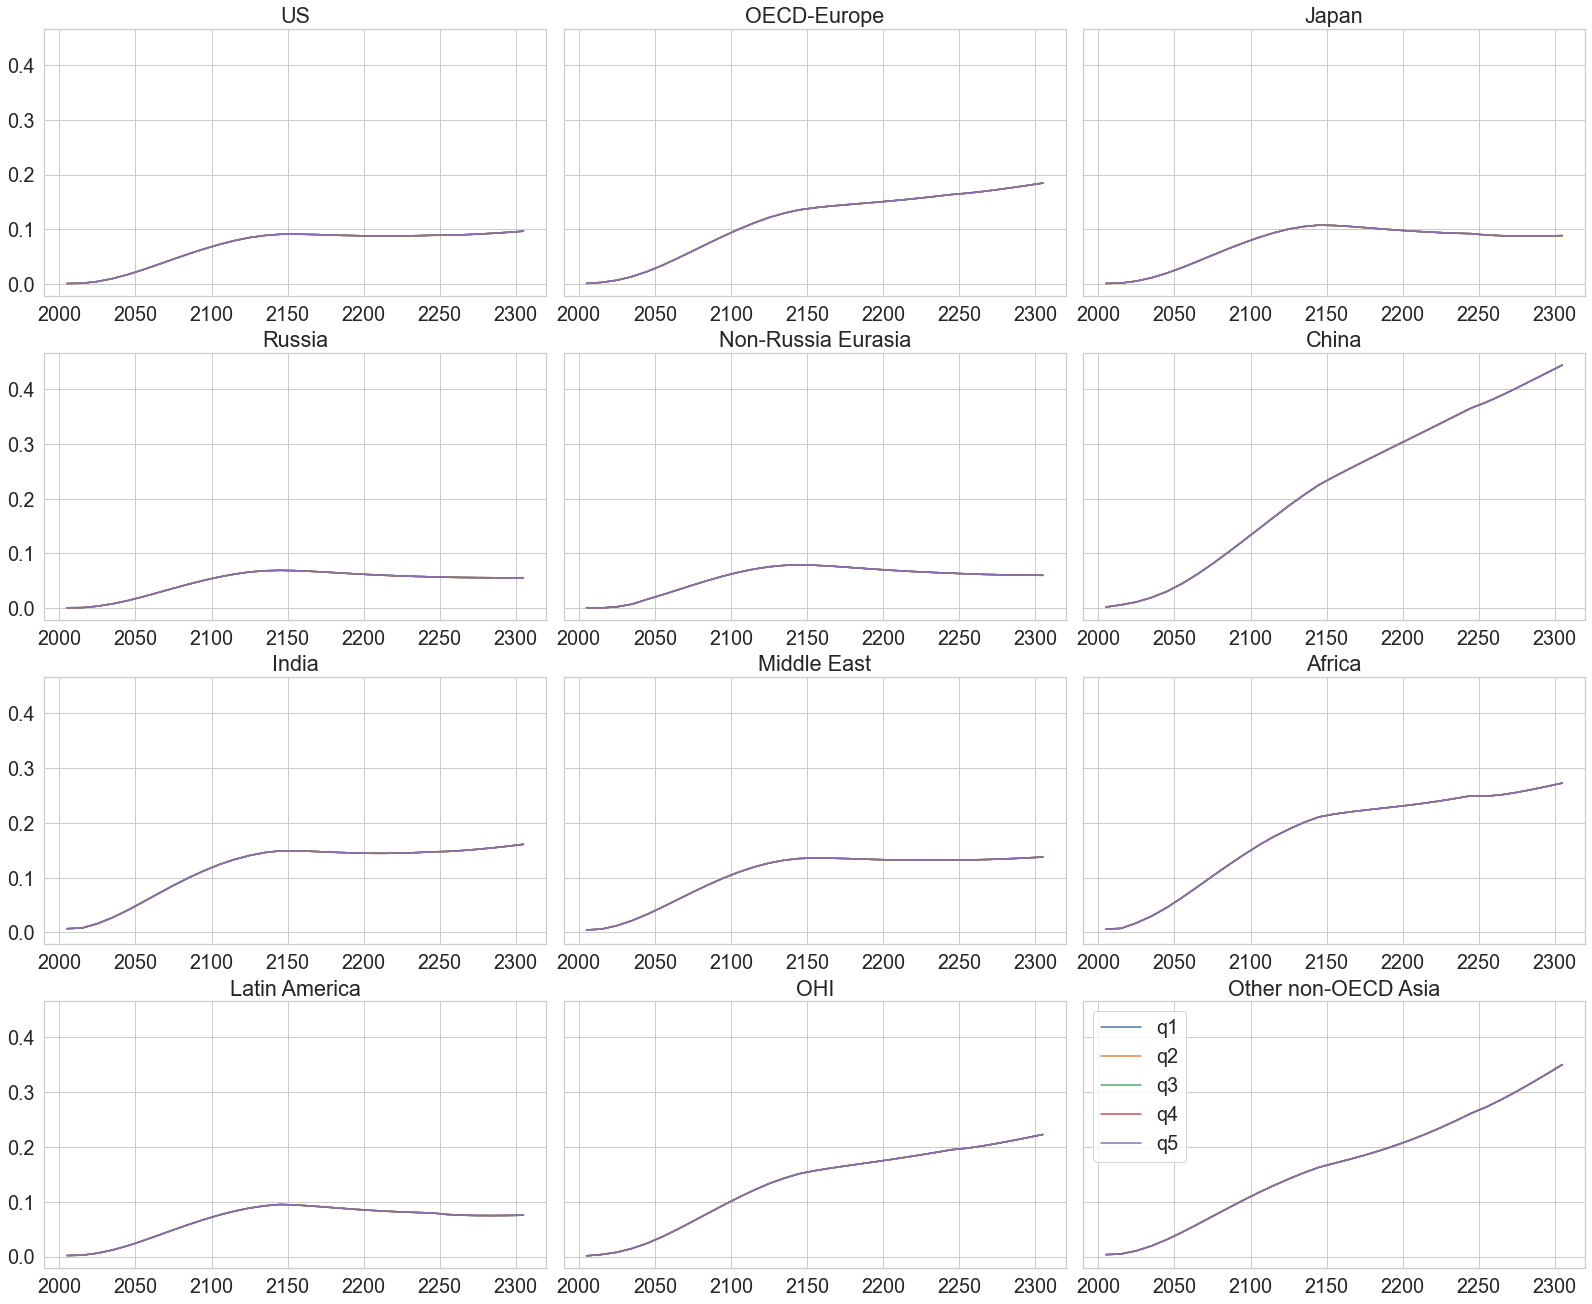

In [22]:
cpcq = results_formatted.df_cpc_pre_damage
damagesq = cpcq - results_formatted.df_cpc_post_damage
ratio_quintiles = damagesq/cpcq
fig, axes = plt.subplots(nrows=4, ncols=3, constrained_layout=True, figsize=(22, 18), sharey='all')

# Figures
for i, ax in enumerate(axes.flat):

    region_values = ratio_quintiles.iloc[:, i]

    for q in range(5):
        q_value = region_values.apply(lambda x: x[q])
        ax.plot(years, q_value, label=f'q{q+1}')
        ax.set_title(f'{region_names[i]}')

plt.legend()
plt.show()

## Atmospheric temperature increase

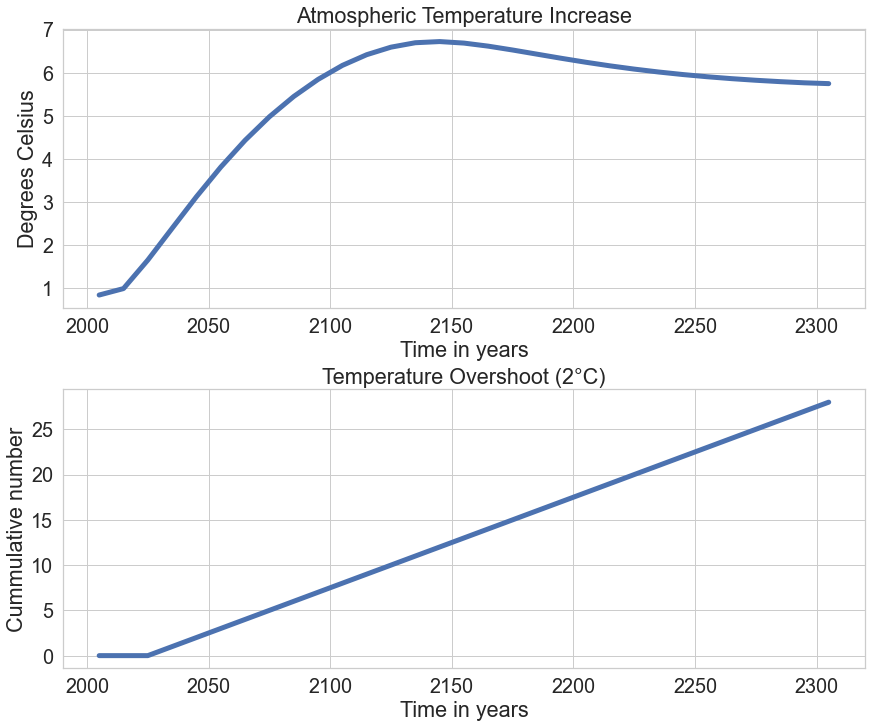

In [23]:
mosaic = """
    AA
    BB
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

data = results_formatted.df_main.loc[:, 'Atmospheric temperature']

ax_dict["A"].plot(data, linewidth=line_with, label='temperature')
ax_dict["A"].set_title('Atmospheric Temperature Increase')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Degrees Celsius')

data = results_formatted.df_main.loc[:, 'Temperature overshoot']

ax_dict["B"].plot(data, linewidth=line_with, label='temperature')
ax_dict["B"].set_title('Temperature Overshoot (2°C)')
ax_dict["B"].set_xlabel('Time in years')
ax_dict["B"].set_ylabel('Cummulative number')

plt.show()

---
## 6. Kaya-related
These results are related to the addition of an explicit energy parameter to the PyRICE model

In [24]:
# Load Eind_results
Eind_results = model.econ_model.Eind
Eind_results.shape

(12, 31)

In [25]:
# Turn Eind_results to a DataFrame
df_Eind = pd.DataFrame(Eind_results, columns=years, index = region_names)
#df_Eind

In [26]:
# Load sigma_region_results (i.e., CO2/GDP)
sigma_region_results = model.econ_model.sigma_region
sigma_region_results.shape

(12, 31)

In [27]:
# Turn sigma_region to a DataFrame
df_sigma_region = pd.DataFrame(sigma_region_results, columns = years, index = region_names)
#df_sigma_region

In [28]:
# Select PyRICE data for 2005 and 2015
df_sigma_init = df_sigma_region[[2005,2015]]
df_sigma_init

,2005,2015
US,0.514775,0.363752
OECD-Europe,0.372327,0.223517
Japan,0.343788,0.339156
Russia,1.039847,0.501194
Non-Russia Eurasia,1.448786,0.722006
China,1.338472,1.276110
India,0.833878,0.767664
Middle East,0.461212,0.316465
Africa,1.406575,0.838158
Latin America,0.530344,0.459946
